In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import beta, norm, expon, gamma

### Beta-Binomial model

In [2]:
n = 9
x = 6
a = 2
b = 2

a_posterior = a+x
b_posterior = b+n-x

theta_map = (a_posterior-1)/(a_posterior+b_posterior-2)
I_Fisher = (a_posterior+b_posterior-2) / (theta_map*(1-theta_map))

In [3]:
theta_grid = np.linspace(0, 1, num=200)
likelihood = beta.pdf(theta_grid, x+1, n-x+1)
prior      = beta.pdf(theta_grid, a, b)
posterior  = beta.pdf(theta_grid, a_posterior, b_posterior)
posterior_normal_approx = norm.pdf(theta_grid, loc=theta_map, scale=np.sqrt(1/I_Fisher))

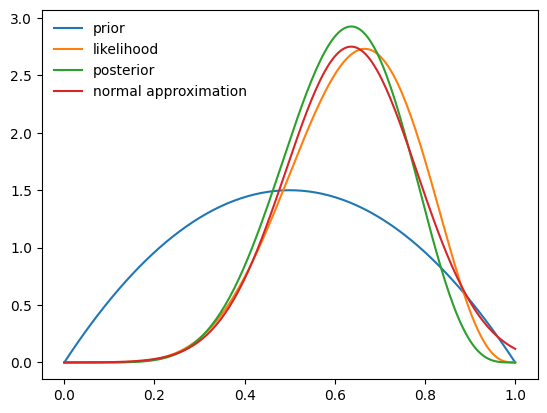

In [4]:
plt.plot(theta_grid, prior, label='prior')
plt.plot(theta_grid, likelihood, label='likelihood')
plt.plot(theta_grid, posterior, label='posterior')
plt.plot(theta_grid, posterior_normal_approx, label='normal approximation')
plt.legend(fontsize=12)
plt.legend(frameon=False)

### Gamma-Exponential model

In [5]:
theta_0 = 4
n = 30
y = expon.rvs(size=n, scale=1/theta_0)

a = 0
b = 0

a_posterior = a+n
b_posterior = b+y.sum()

theta_map = (a_posterior-1) / b_posterior
I_Fisher = (a_posterior-1) / theta_map**2

In [6]:
theta_grid = np.linspace(0, 10, num=200)
likelihood = gamma.pdf(theta_grid, a=n+1, scale=1/y.sum())
prior      = gamma.pdf(theta_grid, a=a+0.01, scale=1/(b+0.01))
posterior  = gamma.pdf(theta_grid, a=a_posterior, scale=1/b_posterior)
posterior_normal_approx = norm.pdf(theta_grid, loc=theta_map, scale=np.sqrt(1/I_Fisher))

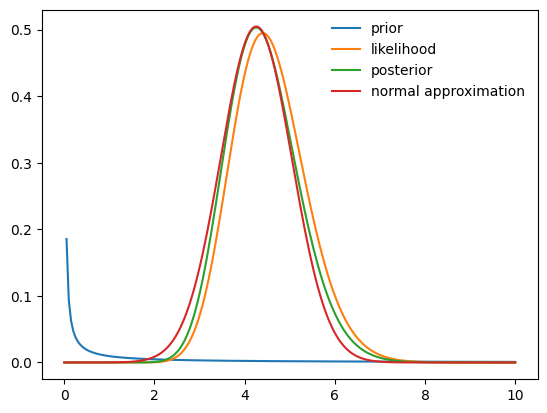

In [7]:
plt.plot(theta_grid, prior, label='prior')
plt.plot(theta_grid, likelihood, label='likelihood')
plt.plot(theta_grid, posterior, label='posterior')
plt.plot(theta_grid, posterior_normal_approx, label='normal approximation')
plt.legend(fontsize=12)
plt.legend(frameon=False)